# Using data web services
We show the use of data web services for an use case: temperature data from [Svalbard](https://en.wikipedia.org/wiki/Svalbard).

## Load data and metadata 
Source the data web service R interface. Data web service R interface can be found here: https://github.com/rkoppe/dws.

In [1]:
source("https://raw.githubusercontent.com/rkoppe/dws/master/dws.R")

Loading required package: jsonlite


Find some sensors offering temperature at Svalbard. Visit https://sensor.awi.de to explore platforms, devices and sensors and find useful platforms and further metadata. Platforms, devices and sensors have codes (aka urn) identifying measurements.

In [2]:
sensors <- dws.sensors('station:svluwobs*temperature*')

In [3]:
sensors

id,code,logicalCode,sensor,unit,platformId
1257,station:svluwobs:svluw2:ctd_103:temperature_sensor_01:temperature,station:svluwobs:svluw2:ctd_103:temperature_sensor_01:temperature,svluwobs:svluw2:ctd_103:temperature_sensor_01:temperature,°C,58
1260,station:svluwobs:svluw2:adcp_17374:temperature,station:svluwobs:svluw2:adcp_17374:temperature,svluwobs:svluw2:adcp_17374:temperature,°C,58
427,station:svluwobs:svluw2:sbe38_657:temperature,station:svluwobs:svluw2:sbe38_657:temperature,svluwobs:svluw2:sbe38_657:temperature,°C,58
441,station:svluwobs:svluw2:ctd_181:temperature,station:svluwobs:svluw2:ctd_181:temperature,svluwobs:svluw2:ctd_181:temperature,°C,58
750,station:svluwobs:fb_731101:oxygen_sensor_574:temperature,station:svluwobs:fb_731101:oxygen_sensor_574:temperature,svluwobs:fb_731101:oxygen_sensor_574:temperature,°C,58
753,station:svluwobs:fb_731101:temperature_freshwater_9999b:temperature,station:svluwobs:fb_731101:temperature_freshwater_9999b:temperature,svluwobs:fb_731101:temperature_freshwater_9999b:temperature,°C,58
754,station:svluwobs:fb_731101:temperature_container_9999a:temperature,station:svluwobs:fb_731101:temperature_container_9999a:temperature,svluwobs:fb_731101:temperature_container_9999a:temperature,°C,58
755,station:svluwobs:fb_731101:temperature_outside_9999c:temperature,station:svluwobs:fb_731101:temperature_outside_9999c:temperature,svluwobs:fb_731101:temperature_outside_9999c:temperature,°C,58
746,station:svluwobs:fb_731101:sbe45_0403:temperature,station:svluwobs:fb_731101:sbe45_0403:temperature,svluwobs:fb_731101:sbe45_0403:temperature,°C,58
1024,station:svluwobs:svluw2:ctd_578:temperature_sensor_01:temperature,station:svluwobs:svluw2:ctd_578:temperature_sensor_01:temperature,svluwobs:svluw2:ctd_578:temperature_sensor_01:temperature,°C,58


Load data for temperature from the CTD 181. By default the service returns hourly averaged values. See http://dashboard.awi.de/data-xxl/ for details of the service.

In [4]:
data <- dws.get("station:svluwobs:svluw2:ctd_181:temperature", begin="2018-10-15", end="2018-11-05")

In [5]:
head(data)

datetime,station.svluwobs.svluw2.ctd_181.temperature..mean....C.
2018-10-15T00:00:00.000,4.149522
2018-10-15T01:00:00.000,4.138868
2018-10-15T02:00:00.000,4.139458
2018-10-15T03:00:00.000,4.134048
2018-10-15T04:00:00.000,4.088826
2018-10-15T05:00:00.000,4.073641


Plot the data against time.

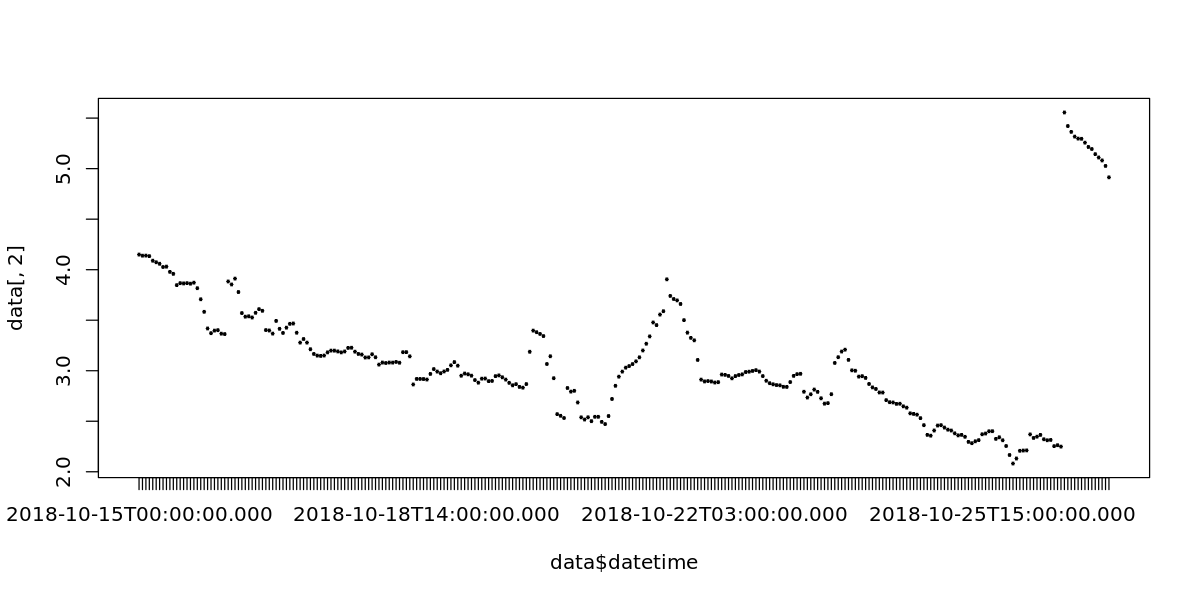

In [6]:
options(repr.plot.width = 10, repr.plot.height = 5)
plot(data[,2] ~ data$datetime, type = "l")

Load basic sensor metadata with the selected code. See https://sensor.awi.de/?urn=station:svluwobs:svluw2:ctd_181:temperature_sensor_01 for more information about this sensor. Note: there are some mapping issues for this example - they will be fixed soon.

In [7]:
sensor <- dws.sensor("station:svluwobs:svluw2:ctd_181:temperature_sensor_01:Temperature")
head(sensor)

[1] "https://sensor.awi.de/rest/sensors/sensorOutputs/getSensorOutputByUrn/station:svluwobs:svluw2:ctd_181:temperature_sensor_01:Temperature"


$id
[1] 849

$name
[1] "Temperature"

$type
[1] "temperature"

$description
[1] "temperature"

$definition
[1] "AWI"

$unit
[1] "°C"

Load the whole platform metadata.

In [8]:
meta <- dws.meta("station:svluwobs")
head(meta)

$id
[1] 220

$code
[1] "station:svluwobs"

$shortName
[1] "SVLUWOBS"

$name
[1] "AWIPEV  Underwater Observatory Svalbard"

$description
[1] "AWIPEV_UNS is designed as an experimental platform project between the HZG and the AWI to host sensors and sensor units in a polar fjord system. The system provides underwater data connection and power as well as a server infrastructure for system and sensor control. Attached is an upward looking ADCP and a CTD plus sensors for turbidity, oxygen, chl-a fluorescence"

$definition
[1] "Station"

We have defined measurement properties like "measurement range" for our temperature measure. Apply it to the data.

In [9]:
range <- meta$map$`station:svluwobs:svluw2:ctd_181:temperature_sensor_01:temperature`$properties$local_range
range

$name
[1] "local_range"

$lower
[1] -1.9

$upper
[1] 10

$unit
[1] "°C"

In [10]:
data$range_check <- 
    range$lower < data$station.svluwobs.svluw2.ctd_181.temperature..mean....C. &&
    range$upper > data$station.svluwobs.svluw2.ctd_181.temperature..mean....C.
tail(data)

,datetime,station.svluwobs.svluw2.ctd_181.temperature..mean....C.,range_check
279,2018-11-01T04:00:00.000,5.194167,TRUE
280,2018-11-01T05:00:00.000,5.143616,TRUE
281,2018-11-01T06:00:00.000,5.110177,TRUE
282,2018-11-01T07:00:00.000,5.081194,TRUE
283,2018-11-01T08:00:00.000,5.026895,TRUE
284,2018-11-01T09:00:00.000,4.913692,TRUE


The CTD is profiling temperature in the water column. Explore data.

In [11]:
sensors <- dws.sensors("station:svluwobs:svluw2:ctd_181*")
sensors

id,code,logicalCode,sensor,unit,platformId
442,station:svluwobs:svluw2:ctd_181:conductivity,station:svluwobs:svluw2:ctd_181:conductivity,svluwobs:svluw2:ctd_181:conductivity,mS/cm,58
440,station:svluwobs:svluw2:ctd_181:pressure,station:svluwobs:svluw2:ctd_181:pressure,svluwobs:svluw2:ctd_181:pressure,dbar,58
441,station:svluwobs:svluw2:ctd_181:temperature,station:svluwobs:svluw2:ctd_181:temperature,svluwobs:svluw2:ctd_181:temperature,°C,58
443,station:svluwobs:svluw2:ctd_181:oxygen_concentration,station:svluwobs:svluw2:ctd_181:oxygen_concentration,svluwobs:svluw2:ctd_181:oxygen_concentration,%,58
444,station:svluwobs:svluw2:ctd_181:chlorophyll_concentration,station:svluwobs:svluw2:ctd_181:chlorophyll_concentration,svluwobs:svluw2:ctd_181:chlorophyll_concentration,µg/L,58
445,station:svluwobs:svluw2:ctd_181:turbidity,station:svluwobs:svluw2:ctd_181:turbidity,svluwobs:svluw2:ctd_181:turbidity,FTU,58
446,station:svluwobs:svluw2:ctd_181:salinity,station:svluwobs:svluw2:ctd_181:salinity,svluwobs:svluw2:ctd_181:salinity,PSU,58
447,station:svluwobs:svluw2:ctd_181:oxygen_mg,station:svluwobs:svluw2:ctd_181:oxygen_mg,svluwobs:svluw2:ctd_181:oxygen_mg,mg/l,58
448,station:svluwobs:svluw2:ctd_181:oxygen_ml,station:svluwobs:svluw2:ctd_181:oxygen_ml,svluwobs:svluw2:ctd_181:oxygen_ml,ml/l,58


In [12]:
data <- dws.get(
  c("station:svluwobs:svluw2:ctd_181:temperature", "station:svluwobs:svluw2:ctd_181:pressure"),
  begin="2018-10-01",
  end="2018-11-05",
  aggregate = "hour")
head(data)

datetime,station.svluwobs.svluw2.ctd_181.temperature..mean....C.,station.svluwobs.svluw2.ctd_181.pressure..mean...dbar.
2018-10-01T00:00:00.000,2.089601,5.955330
2018-10-01T01:00:00.000,2.465500,6.194303
2018-10-01T02:00:00.000,2.899469,6.421582
2018-10-01T03:00:00.000,2.271837,6.513725
2018-10-01T04:00:00.000,2.238089,6.502787
2018-10-01T05:00:00.000,2.214861,6.376047


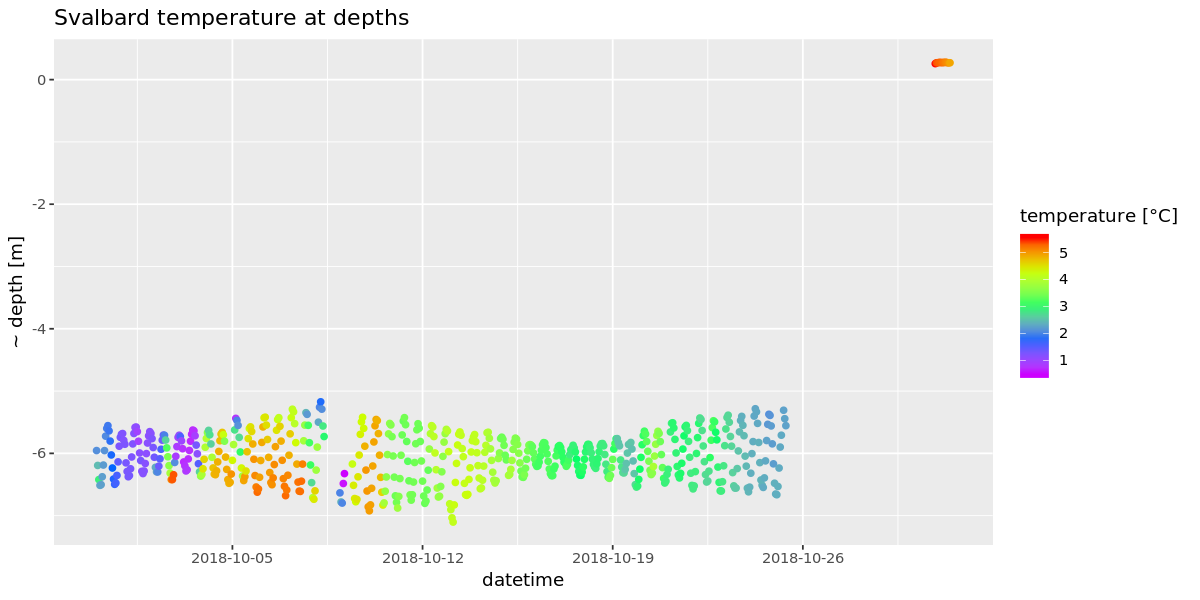

In [13]:
library(ggplot2)
library(scales)

data$timestamp <- as.POSIXct(data$datetime, format = "%Y-%m-%dT%H:%M:%S")
gg <- ggplot(data, aes(x = timestamp, y = -station.svluwobs.svluw2.ctd_181.pressure..mean...dbar.)) +
  geom_point(aes(col = station.svluwobs.svluw2.ctd_181.temperature..mean....C.)) +
  labs(title = "Svalbard temperature at depths", x = "datetime", y = "~ depth [m]", "ok") +
  scale_color_gradientn(colors = rev(rainbow(5)), name = "temperature [°C]") +
  scale_x_datetime(labels = date_format("%Y-%m-%d"), date_breaks = "7 days")

options(repr.plot.width = 10, repr.plot.height = 5)
plot(gg)
